In [1]:
import pandas as pd
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem import AllChem, Descriptors, DataStructs
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D

df = pd.read_csv("../Chembl_RBP.csv")
print(df)

     component_synonym      chembl_id    synonyms     syn_type  \
0               ELAVL1  CHEMBL1240928         NaN          NaN   
1               ELAVL1  CHEMBL1240928         NaN          NaN   
2               ELAVL1  CHEMBL1240928         NaN          NaN   
3               ELAVL1  CHEMBL1240928         NaN          NaN   
4               ELAVL1  CHEMBL1240928         NaN          NaN   
...                ...            ...         ...          ...   
1108              SMN2       CHEMBL98  Vorinostat          JAN   
1109              SMN2       CHEMBL98  Vorinostat  MERCK_INDEX   
1110              SMN2       CHEMBL98  Vorinostat        OTHER   
1111              SMN2       CHEMBL98  Vorinostat         USAN   
1112              SMN2       CHEMBL98     Zolinza   TRADE_NAME   

       molecule_type  max_phase                canonical_smiles  \
0     Small molecule          0  Cc1occ2c1C(=O)c1c(O)ccc(O)c1C2   
1     Small molecule          0  Cc1occ2c1C(=O)c1c(O)ccc(O)c1C2   
2     

1113 546
[('CHEMBL1240928', 'Small molecule', 'Cc1occ2c1C(=O)c1c(O)ccc(O)c1C2', 0), ('CHEMBL1240971', 'Small molecule', 'Cc1cc(O)cc2cc3c(c(O)c12)C(=O)CCC3O', 0), ('CHEMBL1242196', 'Small molecule', 'Cc1cc(O)c2c(O)cccc2c1-c1cc(=O)cc(O)o1', 0), ('CHEMBL1242197', 'Small molecule', 'Cc1cc(O)cc2oc(Cc3cc(O)cc(=O)o3)cc(=O)c12', 0), ('CHEMBL1309685', 'Small molecule', 'COc1cc(OC)c2c(-c3ccccc3)cc(=O)oc2c1C(CC(=O)N1CCCC1)c1ccc2c(c1)OCO2', 0), ('CHEMBL1330249', 'Small molecule', 'CCN(CC)C(=O)CC(c1cc(OC)c(OC)c(OC)c1)c1c(OC)cc(OC)c2c(-c3ccccc3)cc(=O)oc12', 0), ('CHEMBL1390568', 'Small molecule', 'COc1ccc(C(CC(=O)N2CCOCC2)c2c(OC)cc(OC)c3c(-c4ccccc4)cc(=O)oc23)cc1', 0), ('CHEMBL1398194', 'Small molecule', 'COc1cc(C(CC(=O)N2CCCC2)c2c(OC)cc(OC)c3c(-c4ccccc4)cc(=O)oc23)cc(OC)c1OC', 0), ('CHEMBL1483840', 'Small molecule', 'CC#CC#Cc1cccc(=O)o1', 0), ('CHEMBL1499653', 'Small molecule', 'COc1ccc(C(CC(=O)N2CCCC2)c2c(OC)cc(OC)c3c(-c4ccccc4)cc(=O)oc23)cc1', 0), ('CHEMBL1506938', 'Small molecule', 'Cc1ccc(Nc2cc

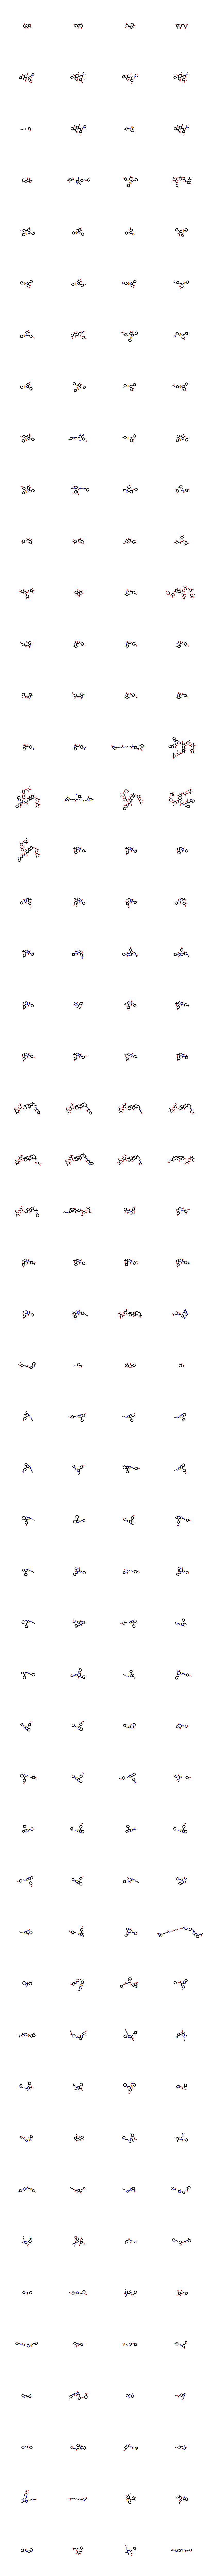

In [3]:
m = df[['chembl_id','molecule_type','canonical_smiles', 'max_phase']] 
r = m.to_records(index=False)
#print(r[0][1])
#mol = Chem.MolFromSmiles(r[0][1])
mol = []
chemid = []
rcl = []
for i in r:
    #print(i[1])
    
    if i[1] != 'Protein':
        if (i[0] not in chemid):
            #print(i)
            chemid.append(i[0])
            i[1] = 'Small molecule'
            rcl.append(i)
            mt = Chem.MolFromSmiles(i[2])
            mol.append(mt)
        #else:
        #    print('Duplicate', i[0])
    else:
        print('Fail',i)

print(len(r), len(rcl))
print(rcl)
Draw.MolsToGridImage(mol, molsPerRow=4, maxMols = 200)

In [13]:
nmol = len(mol)
print(nmol)
#fps = [Chem.RDKFingerprint(i) for i in mol]
fps = [AllChem.GetMorganFingerprintAsBitVect(i,3,nBits=2048,useFeatures=True) for i in mol]
tmd = []
for i in range(0, nmol-1):
    for j in range(i+1, nmol):
        td = DataStructs.FingerprintSimilarity(fps[i],fps[j])
        if td >= 0.7:
            #print(r[i][0],r[j][0],td)
            k = (rcl[i][0],"cc",rcl[j][0],td)
            #print(k)
            tmd.append(k)
        #else:
            #print(rcl[i][0],rcl[j][0],'No Connect')
            
print(len(tmd))
print(tmd)

259
487
[('CHEMBL1213881', 'cc', 'CHEMBL1213882', 0.7083333333333334), ('CHEMBL1213881', 'cc', 'CHEMBL1213883', 0.7083333333333334), ('CHEMBL1213881', 'cc', 'CHEMBL401701', 0.7027027027027027), ('CHEMBL1213881', 'cc', 'CHEMBL402627', 0.7391304347826086), ('CHEMBL1213948', 'cc', 'CHEMBL1213949', 0.7910447761194029), ('CHEMBL1213948', 'cc', 'CHEMBL1213995', 0.7464788732394366), ('CHEMBL1213948', 'cc', 'CHEMBL1214127', 0.7794117647058824), ('CHEMBL1213949', 'cc', 'CHEMBL1213995', 0.7066666666666667), ('CHEMBL1213949', 'cc', 'CHEMBL1214127', 0.7361111111111112), ('CHEMBL1213950', 'cc', 'CHEMBL1213994', 0.8356164383561644), ('CHEMBL1213950', 'cc', 'CHEMBL1213997', 0.8591549295774648), ('CHEMBL1213950', 'cc', 'CHEMBL1214051', 0.8840579710144928), ('CHEMBL1213950', 'cc', 'CHEMBL1214052', 0.7317073170731707), ('CHEMBL1213950', 'cc', 'CHEMBL1214053', 0.75), ('CHEMBL1213950', 'cc', 'CHEMBL1214054', 0.76), ('CHEMBL1213950', 'cc', 'CHEMBL1214125', 0.76), ('CHEMBL1213994', 'cc', 'CHEMBL1213997', 0.